# Toy data and toy scenario - providing proof for paper


In [1]:
# import package

import numpy as np
import pandas as pd
import itertools
from timeit import default_timer as timer
import networkx as nx
import pylab


In [2]:
# 3. AFED = Accessibility of flow taking existing destinations

def AFED(flow_df, row_index): # AFAPF
    
    
    # define O and D for each row the variables
    D = flow_df['dest_ID'][row_index]
    O = flow_df['origin_ID'][row_index]
    
    # get the list of possible destinations
    all_dest = (flow_df.query('origin_ID == @O')
                .query('weight > 0')
                ['dest_ID']
                .unique()
               )    
    
    # Create all destination flows 
    x1 = pd.DataFrame({'D': np.array([D]*len(all_dest), dtype=object), 
                       'dests':all_dest}).merge(flow_df, how='left', left_on=['D','dests'], right_on=['origin_ID','dest_ID'])
    
    # merge with the distances and masses 
    
    # Delete the flow to origin
    x1 = x1[~x1.dests.isin(list(O))]    

    # calculate the accessibility
    A = (x1['dist']*x1['dest_mass']).sum()

    return A

In [3]:
def pgr(graph, name, nodes, weight):
    # calculate the closenest
    close = nx.pagerank_scipy(G = graph, weight = weight, max_iter = 50)
    # put it into a dataframe 
    x = pd.DataFrame.from_dict(close,  orient='index')
     #x[0] = x[0]*1000
    x = x.reset_index()
    x = x.rename({0: name},axis = 1)

    gdf = nodes.merge(x, left_on = 'lad17cd', right_on = 'index', how = 'left')
    return gdf

def PGR_from_graph(flow, edge_value, points, var_name):
    
    # create graphs
    G = nx.from_pandas_edgelist(flow, source='origin', target='destination', edge_attr=[edge_value], create_using=nx.MultiDiGraph())
    
    # calculate the pgr    
    gdf =  pgr(graph = G, name = var_name, weight = edge_value, nodes = points)
    gdf = gdf.drop(['index'], axis=1)
    
    return gdf

In [2]:
nodes = ['A','B','C','D','E']
destination_masses = [60,10,10,30,50]

all_flow = pd.DataFrame( list(itertools.product(nodes,nodes
                                               )
                             )
                       ).rename(columns = {0:'origin_ID', 1:'destination_ID'
                                          }
                               )

masses = {'nodes': nodes,'Dest_masses': destination_masses
         }

masses = pd.DataFrame({'nodes': nodes,'Dest_masses': destination_masses
                      }, columns = ['nodes','Dest_masses'
                                   ]
                     )

all_flow['volume_in_unipartite'] = [10,10,10,10,10,
                                    10,0,0,10,10,
                                    10,0,0,10,0,
                                    10,10,10,0,10,
                                    10,10,0,10,10]

all_flow['volume_in_bipirtate'] = [0,0,10,10,10,
                          0,0,0,10,10,
                          0,0,0,0,0,
                          0,0,0,0,0,
                          0,0,0,0,0]

all_flow['distances'] = [0,8,2,5,5,
                          8,0,10,7,4,
                          2,10,0,6,9,
                          5,7,6,0,9,
                          5,4,9,2,0]

In [4]:
nodes = ['A','B','C','D','E']



all_combinations = pd.DataFrame( list( itertools.product(nodes,nodes))
                       ).rename(columns = {0:'origin_ID',
                                        1:'destination_ID'})

nodes = ['A','B','C','D','E']
destination_masses = [60,10,10,30,50]


masses = {'nodes': nodes,
        'Dest_masses': destination_masses
        }

masses = pd.DataFrame(masses, columns = ['nodes','Dest_masses'])
masses

,nodes,Dest_masses
0,A,60
1,B,10
2,C,10
3,D,30
4,E,50


In [3]:
all_flow

,origin_ID,destination_ID,volume_in_unipartite,volume_in_bipirtate,distances
0,A,A,10,0,0
1,A,B,10,0,8
2,A,C,10,10,2
3,A,D,10,10,5
4,A,E,10,10,5
5,B,A,10,0,8
6,B,B,0,0,0
7,B,C,0,0,10
8,B,D,10,10,7
9,B,E,10,10,4


In [5]:
all_combinations['flow_volume_in_unipartite'] = [10,10,10,10,10,10,0,0,10,10,10,0,0,10,0,10,10,10,0,10,10,10,0,10,10]
all_combinations

,origin_ID,destination_ID,flow_volume_in_unipartite
0,A,A,10
1,A,B,10
2,A,C,10
3,A,D,10
4,A,E,10
5,B,A,10
6,B,B,0
7,B,C,0
8,B,D,10
9,B,E,10


In [6]:
all_combinations['exists_in_bipirtate'] = [0,0,10,10,10,
                          0,0,0,10,10,
                          0,0,0,0,0,
                          0,0,0,0,0,
                          0,0,0,0,0]

all_combinations['distances'] = [0,8,2,5,5,
                          8,0,10,7,4,
                          2,10,0,6,9,
                          5,7,6,0,9,
                          5,4,9,2,0]
all_combinations['distances_0'] = [0,8,2,0,5,
                          8,0,10,7,4,
                          2,10,0,6,9,
                          0,7,6,0,9,
                          5,4,9,2,0]
all_combinations

,origin_ID,destination_ID,flow_volume_in_unipartite,exists_in_bipirtate,distances,distances_0
0,A,A,10,0,0,0
1,A,B,10,0,8,8
2,A,C,10,10,2,2
3,A,D,10,10,5,0
4,A,E,10,10,5,5
5,B,A,10,0,8,8
6,B,B,0,0,0,0
7,B,C,0,0,10,10
8,B,D,10,10,7,7
9,B,E,10,10,4,4


In [7]:
all_combinations['exists_in_bipirtate'][all_combinations['exists_in_bipirtate'] == 0] = np.nan
all_combinations['flow_volume_in_unipartite'][all_combinations['flow_volume_in_unipartite'] == 0] = np.nan

<ipython-input-7-f8a25033551b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_combinations['exists_in_bipirtate'][all_combinations['exists_in_bipirtate'] == 0] = np.nan
<ipython-input-7-f8a25033551b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_combinations['flow_volume_in_unipartite'][all_combinations['flow_volume_in_unipartite'] == 0] = np.nan


In [8]:
all_combinations = all_combinations.merge(masses, how = 'left', left_on = 'destination_ID', right_on = 'nodes')
all_combinations

,origin_ID,destination_ID,flow_volume_in_unipartite,exists_in_bipirtate,distances,distances_0,nodes,Dest_masses
0,A,A,10.0,NaN,0,0,A,60
1,A,B,10.0,NaN,8,8,B,10
2,A,C,10.0,10.0,2,2,C,10
3,A,D,10.0,10.0,5,0,D,30
4,A,E,10.0,10.0,5,5,E,50
5,B,A,10.0,NaN,8,8,A,60
6,B,B,NaN,NaN,0,0,B,10
7,B,C,NaN,NaN,10,10,C,10
8,B,D,10.0,10.0,7,7,D,30
9,B,E,10.0,10.0,4,4,E,50


In [9]:
# base uni
flow1 = all_combinations.loc[:,['origin_ID','destination_ID','distances','flow_volume_in_unipartite','Dest_masses']]
flow1 = flow1.rename(columns = {'origin_ID':'origin_ID', 
                                            'destination_ID':'dest_ID', 
                                            'distances':'dist', 
                                            'flow_volume_in_unipartite':'weight', 
                                            'Dest_masses':'dest_mass'})
# base bi
flow2 = all_combinations.loc[:,['origin_ID','destination_ID','distances','exists_in_bipirtate','Dest_masses']]
flow2 = flow2.rename(columns = {'origin_ID':'origin_ID', 
                                            'destination_ID':'dest_ID', 
                                            'distances':'dist', 
                                            'exists_in_bipirtate':'weight', 
                                            'Dest_masses':'dest_mass'})
# uni ch
flow3 = all_combinations.loc[:,['origin_ID','destination_ID','distances','flow_volume_in_unipartite','Dest_masses']]
flow3.loc[3,['flow_volume_in_unipartite']] = 0
flow3 = flow3.rename(columns = {'origin_ID':'origin_ID', 
                                            'destination_ID':'dest_ID', 
                                            'distances':'dist', 
                                            'flow_volume_in_unipartite':'weight', 
                                            'Dest_masses':'dest_mass'})
# bi ch
flow4 = all_combinations.loc[:,['origin_ID','destination_ID','distances','exists_in_bipirtate','Dest_masses']]
flow4.loc[3,['exists_in_bipirtate']]  = 0
flow4 = flow4.rename(columns = {'origin_ID':'origin_ID', 
                                            'destination_ID':'dest_ID', 
                                            'distances':'dist', 
                                            'exists_in_bipirtate':'weight', 
                                            'Dest_masses':'dest_mass'})
# uni low
flow5 = all_combinations.loc[:,['origin_ID','destination_ID','distances','flow_volume_in_unipartite','Dest_masses']]
flow5.loc[3,['flow_volume_in_unipartite']] = 5
flow5 = flow5.rename(columns = {'origin_ID':'origin_ID', 
                                            'destination_ID':'dest_ID', 
                                            'distances':'dist', 
                                            'flow_volume_in_unipartite':'weight', 
                                            'Dest_masses':'dest_mass'})
# bi low
flow6 = all_combinations.loc[:,['origin_ID','destination_ID','distances','exists_in_bipirtate','Dest_masses']]
flow6.loc[3,['exists_in_bipirtate']] = 5
flow6 = flow6.rename(columns = {'origin_ID':'origin_ID', 
                                            'destination_ID':'dest_ID', 
                                            'distances':'dist', 
                                            'exists_in_bipirtate':'weight', 
                                            'Dest_masses':'dest_mass'})

# uni low
flow5 = all_combinations.loc[:,['origin_ID','destination_ID','distances','flow_volume_in_unipartite','Dest_masses']]
flow5.loc[3,['flow_volume_in_unipartite']] = 5
flow5 = flow5.rename(columns = {'origin_ID':'origin_ID', 
                                            'destination_ID':'dest_ID', 
                                            'distances':'dist', 
                                            'flow_volume_in_unipartite':'weight', 
                                            'Dest_masses':'dest_mass'})
# bi low
flow6 = all_combinations.loc[:,['origin_ID','destination_ID','distances','exists_in_bipirtate','Dest_masses']]
flow6.loc[3,['exists_in_bipirtate']] = 5
flow6 = flow6.rename(columns = {'origin_ID':'origin_ID', 
                                            'destination_ID':'dest_ID', 
                                            'distances':'dist', 
                                            'exists_in_bipirtate':'weight', 
                                            'Dest_masses':'dest_mass'})


In [10]:
# base uni
start = timer()
A_ij = []
for idx in flow1.index:
    A = AFED(flow_df=flow1, row_index=idx)
    A_ij.append(A)
end = timer()
all_combinations['acc_uni'] = pd.Series(A_ij)
print('time: ' + str(end - start))

# base bi
start = timer()
A_ij = []
for idx in flow2.index:
    A = AFED(flow_df=flow2, row_index=idx)
    A_ij.append(A)
end = timer()
all_combinations['acc_bi'] = pd.Series(A_ij)
print('time: ' + str(end - start))

time: 0.16702019999999607
time: 0.1630078000000026


In [11]:
# uni_ch
start = timer()
A_ij = []
for idx in flow3.index:
    A = AFED(flow_df=flow3, row_index=idx)
    A_ij.append(A)
end = timer()
all_combinations['acc_uni_ch'] = pd.Series(A_ij)
print('time: ' + str(end - start))

# bi_ch
start = timer()
A_ij = []
for idx in flow4.index:
    A = AFED(flow_df=flow4, row_index=idx)
    A_ij.append(A)
end = timer()
all_combinations['acc_bi_ch'] = pd.Series(A_ij)
print('time: ' + str(end - start))

time: 0.19510480000000996
time: 0.1499614999999892


In [12]:
# uni_low
start = timer()
A_ij = []
for idx in flow5.index:
    A = AFED(flow_df=flow5, row_index=idx)
    A_ij.append(A)
end = timer()
all_combinations['acc_uni_low'] = pd.Series(A_ij)
print('time: ' + str(end - start))

# bi_low
start = timer()
A_ij = []
for idx in flow6.index:
    A = AFED(flow_df=flow6, row_index=idx)
    A_ij.append(A)
end = timer()
all_combinations['acc_bi_low'] = pd.Series(A_ij)
print('time: ' + str(end - start))

time: 0.1698311999999902
time: 0.15845659999999384


In [13]:
#all_combinations['dist*mass'] = all_combinations['distances']*all_combinations['Dest_masses']
all_combinations

,origin_ID,destination_ID,flow_volume_in_unipartite,exists_in_bipirtate,distances,distances_0,nodes,Dest_masses,acc_uni,acc_bi,acc_uni_ch,acc_bi_ch,acc_uni_low,acc_bi_low
0,A,A,10.0,NaN,0,0,A,60,500,420,350,270,500,420
1,A,B,10.0,NaN,8,8,B,10,510,510,300,300,510,510
2,A,C,10.0,10.0,2,2,C,10,730,630,550,450,730,630
3,A,D,10.0,10.0,5,0,D,30,580,510,580,510,580,510
4,A,E,10.0,10.0,5,5,E,50,190,150,130,90,190,150
5,B,A,10.0,NaN,8,8,A,60,400,400,400,400,400,400
6,B,B,NaN,NaN,0,0,B,10,890,410,890,410,890,410
7,B,C,NaN,NaN,10,10,C,10,750,630,750,630,750,630
8,B,D,10.0,10.0,7,7,D,30,750,450,750,450,750,450
9,B,E,10.0,10.0,4,4,E,50,360,60,360,60,360,60


In [14]:
all_combinations['diff_uni'] = all_combinations['acc_uni'] - all_combinations['acc_uni_ch']
all_combinations['diff_bi'] = all_combinations['acc_bi'] - all_combinations['acc_bi_ch']
all_combinations['diff_uni_low'] = all_combinations['acc_uni'] - all_combinations['acc_uni_low']
all_combinations['diff_bi_low'] = all_combinations['acc_bi'] - all_combinations['acc_bi_low']

In [15]:
all_combinations

,origin_ID,destination_ID,flow_volume_in_unipartite,exists_in_bipirtate,distances,distances_0,nodes,Dest_masses,acc_uni,acc_bi,acc_uni_ch,acc_bi_ch,acc_uni_low,acc_bi_low,diff_uni,diff_bi,diff_uni_low,diff_bi_low
0,A,A,10.0,NaN,0,0,A,60,500,420,350,270,500,420,150,150,0,0
1,A,B,10.0,NaN,8,8,B,10,510,510,300,300,510,510,210,210,0,0
2,A,C,10.0,10.0,2,2,C,10,730,630,550,450,730,630,180,180,0,0
3,A,D,10.0,10.0,5,0,D,30,580,510,580,510,580,510,0,0,0,0
4,A,E,10.0,10.0,5,5,E,50,190,150,130,90,190,150,60,60,0,0
5,B,A,10.0,NaN,8,8,A,60,400,400,400,400,400,400,0,0,0,0
6,B,B,NaN,NaN,0,0,B,10,890,410,890,410,890,410,0,0,0,0
7,B,C,NaN,NaN,10,10,C,10,750,630,750,630,750,630,0,0,0,0
8,B,D,10.0,10.0,7,7,D,30,750,450,750,450,750,450,0,0,0,0
9,B,E,10.0,10.0,4,4,E,50,360,60,360,60,360,60,0,0,0,0


In [16]:
all_combinations['uni_perc_low_change'] =  (abs(all_combinations['diff_uni_low'])/all_combinations['acc_uni'])*100
all_combinations['uni_perc_rem_change'] =  (abs(all_combinations['diff_uni'])/all_combinations['acc_uni'])*100

all_combinations['bi_perc_low_change'] =  (abs(all_combinations['diff_bi_low'])/all_combinations['acc_bi'])*100
all_combinations['bi_perc_rem_change'] =  (abs(all_combinations['diff_bi'])/all_combinations['acc_bi'])*100

In [17]:
all_combinations

,origin_ID,destination_ID,flow_volume_in_unipartite,exists_in_bipirtate,distances,distances_0,nodes,Dest_masses,acc_uni,acc_bi,...,acc_uni_low,acc_bi_low,diff_uni,diff_bi,diff_uni_low,diff_bi_low,uni_perc_low_change,uni_perc_rem_change,bi_perc_low_change,bi_perc_rem_change
0,A,A,10.0,NaN,0,0,A,60,500,420,...,500,420,150,150,0,0,0.0,30.000000,0.0,35.714286
1,A,B,10.0,NaN,8,8,B,10,510,510,...,510,510,210,210,0,0,0.0,41.176471,0.0,41.176471
2,A,C,10.0,10.0,2,2,C,10,730,630,...,730,630,180,180,0,0,0.0,24.657534,0.0,28.571429
3,A,D,10.0,10.0,5,0,D,30,580,510,...,580,510,0,0,0,0,0.0,0.000000,0.0,0.000000
4,A,E,10.0,10.0,5,5,E,50,190,150,...,190,150,60,60,0,0,0.0,31.578947,0.0,40.000000
5,B,A,10.0,NaN,8,8,A,60,400,400,...,400,400,0,0,0,0,0.0,0.000000,0.0,0.000000
6,B,B,NaN,NaN,0,0,B,10,890,410,...,890,410,0,0,0,0,0.0,0.000000,0.0,0.000000
7,B,C,NaN,NaN,10,10,C,10,750,630,...,750,630,0,0,0,0,0.0,0.000000,0.0,0.000000
8,B,D,10.0,10.0,7,7,D,30,750,450,...,750,450,0,0,0,0,0.0,0.000000,0.0,0.000000
9,B,E,10.0,10.0,4,4,E,50,360,60,...,360,60,0,0,0,0,0.0,0.000000,0.0,0.000000


In [18]:
all_combinations.to_csv('./demo_complete2.csv')

## works the same so where is the difference?


I found the error. Basically the whole issue is related to the fact that the prescription flow is multidigriph.

If the network is simple digraph with unique combinations of O and D, then the process is:
> data > construct complete data > calculate accessibility > merge back to the original data

If the network is multidigraph (has multiple flows per flux), then the process is;
> data > groupby([O,D]).mean() > construct complete data > calculate accessibility > merge back to the original data

So if I remove unique flow, in other words, if I change the overall weight on a flux to 0, than the accessibility changes.
However, if I remove only one per in flux, in other words, if I don't remove a flux and just slightly decrease the flow volume, nothing is going to happen. This means that the accessibility from fotheringham only affects;
1. those nodes that are directly related to origin of affected flow
2. the nodes, if the affected flow completely dissapears. Because the Accessibility does not consider the flow volume at all only the distances and the masses, the effect of small changes will not be visible in the accessibility.

So the Competing Destination model is suitable for use on networks where the volume does not matter (is essentially binary) and for detectingonly local relationships.

In [19]:
all_combinations[all_combinations['diff_uni'] > 0 ]

,origin_ID,destination_ID,flow_volume_in_unipartite,exists_in_bipirtate,distances,distances_0,nodes,Dest_masses,acc_uni,acc_bi,...,acc_uni_low,acc_bi_low,diff_uni,diff_bi,diff_uni_low,diff_bi_low,uni_perc_low_change,uni_perc_rem_change,bi_perc_low_change,bi_perc_rem_change
0,A,A,10.0,NaN,0,0,A,60,500,420,...,500,420,150,150,0,0,0.0,30.000000,0.0,35.714286
1,A,B,10.0,NaN,8,8,B,10,510,510,...,510,510,210,210,0,0,0.0,41.176471,0.0,41.176471
2,A,C,10.0,10.0,2,2,C,10,730,630,...,730,630,180,180,0,0,0.0,24.657534,0.0,28.571429
4,A,E,10.0,10.0,5,5,E,50,190,150,...,190,150,60,60,0,0,0.0,31.578947,0.0,40.000000


In [20]:
all_combinations[all_combinations['diff_bi'] > 0 ]

,origin_ID,destination_ID,flow_volume_in_unipartite,exists_in_bipirtate,distances,distances_0,nodes,Dest_masses,acc_uni,acc_bi,...,acc_uni_low,acc_bi_low,diff_uni,diff_bi,diff_uni_low,diff_bi_low,uni_perc_low_change,uni_perc_rem_change,bi_perc_low_change,bi_perc_rem_change
0,A,A,10.0,NaN,0,0,A,60,500,420,...,500,420,150,150,0,0,0.0,30.000000,0.0,35.714286
1,A,B,10.0,NaN,8,8,B,10,510,510,...,510,510,210,210,0,0,0.0,41.176471,0.0,41.176471
2,A,C,10.0,10.0,2,2,C,10,730,630,...,730,630,180,180,0,0,0.0,24.657534,0.0,28.571429
4,A,E,10.0,10.0,5,5,E,50,190,150,...,190,150,60,60,0,0,0.0,31.578947,0.0,40.000000


# change happened to those that originate in same origin as removed flow

# PGR

In [21]:
all_nodes = pd.DataFrame(nodes).rename(columns = {0:'name'})
all_nodes

,name
0,A
1,B
2,C
3,D
4,E


In [22]:
flow1['weight'] = flow1['weight'] .fillna(0)
flow2['weight'] = flow2['weight'] .fillna(0)
flow3['weight'] = flow3['weight'] .fillna(0)
flow4['weight'] = flow4['weight'] .fillna(0)
flow5['weight'] = flow5['weight'] .fillna(0)
flow6['weight'] = flow6['weight'] .fillna(0)

In [23]:
flow1

,origin_ID,dest_ID,dist,weight,dest_mass
0,A,A,0,10.0,60
1,A,B,8,10.0,10
2,A,C,2,10.0,10
3,A,D,5,10.0,30
4,A,E,5,10.0,50
5,B,A,8,10.0,60
6,B,B,0,0.0,10
7,B,C,10,0.0,10
8,B,D,7,10.0,30
9,B,E,4,10.0,50


In [24]:
def pgr(graph, name, nodes, weight):
    # calculate the closenest
    close = nx.pagerank_scipy(G = graph, weight = weight, max_iter = 50)
    # put it into a dataframe 
    x = pd.DataFrame.from_dict(close,  orient='index')
     #x[0] = x[0]*1000
    x = x.reset_index()
    x = x.rename({0: name},axis = 1)

    gdf = nodes.merge(x, left_on = 'name', right_on = 'index', how = 'left')
    return gdf

def PGR_from_graph(flow, edge_value, points, var_name):
    
    # create graphs
    G = nx.from_pandas_edgelist(flow, source='origin_ID', target='dest_ID', edge_attr=[edge_value], create_using=nx.MultiDiGraph())
    
    # calculate the pgr    
    gdf =  pgr(graph = G, name = var_name, weight = edge_value, nodes = points)
    gdf = gdf.drop(['index'], axis=1)
    
    return gdf

In [25]:
all_nodes2 = PGR_from_graph(flow = flow1, edge_value = 'weight', points = all_nodes, var_name = 'PGR_uni_raw')
all_nodes2 = PGR_from_graph(flow = flow3, edge_value = 'weight', points = all_nodes2, var_name = 'PGR_uni_rem')
all_nodes2 = PGR_from_graph(flow = flow5, edge_value = 'weight', points = all_nodes2, var_name = 'PGR_uni_low')

all_nodes2 = PGR_from_graph(flow = flow2, edge_value = 'weight', points = all_nodes2, var_name = 'PGR_bi_raw')
all_nodes2 = PGR_from_graph(flow = flow4, edge_value = 'weight', points = all_nodes2, var_name = 'PGR_bi_rem')
all_nodes2 = PGR_from_graph(flow = flow6, edge_value = 'weight', points = all_nodes2, var_name = 'PGR_bi_low')

In [26]:
all_nodes2

,name,PGR_uni_raw,PGR_uni_rem,PGR_uni_low,PGR_bi_raw,PGR_bi_rem,PGR_bi_low
0,A,0.269155,0.282480,0.274919,0.149254,0.149254,0.149254
1,B,0.169022,0.177389,0.172641,0.149254,0.149254,0.149254
2,C,0.122928,0.129014,0.125560,0.191542,0.212687,0.200000
3,D,0.221983,0.183466,0.205324,0.254975,0.212687,0.238060
4,E,0.216911,0.227650,0.221556,0.254975,0.276119,0.263433


In [27]:
all_nodes2['diff_uni'] = all_nodes2['PGR_uni_raw'] - all_nodes2['PGR_uni_rem']
all_nodes2['diff_uni_low'] = all_nodes2['PGR_uni_raw'] - all_nodes2['PGR_bi_rem']

all_nodes2['diff_bi'] = all_nodes2['PGR_bi_raw'] - all_nodes2['PGR_uni_low']
all_nodes2['diff_bi_low'] = all_nodes2['PGR_bi_raw'] - all_nodes2['PGR_bi_low']

In [28]:
all_nodes2

,name,PGR_uni_raw,PGR_uni_rem,PGR_uni_low,PGR_bi_raw,PGR_bi_rem,PGR_bi_low,diff_uni,diff_uni_low,diff_bi,diff_bi_low
0,A,0.269155,0.282480,0.274919,0.149254,0.149254,0.149254,-0.013325,0.119901,-0.125665,0.000000
1,B,0.169022,0.177389,0.172641,0.149254,0.149254,0.149254,-0.008368,0.019768,-0.023387,0.000000
2,C,0.122928,0.129014,0.125560,0.191542,0.212687,0.200000,-0.006086,-0.089758,0.065982,-0.008458
3,D,0.221983,0.183466,0.205324,0.254975,0.212687,0.238060,0.038517,0.009297,0.049651,0.016915
4,E,0.216911,0.227650,0.221556,0.254975,0.276119,0.263433,-0.010739,-0.059208,0.033419,-0.008458


In [29]:
all_nodes2['uni_perc_low_change'] =  (abs(all_nodes2['diff_uni_low'])/all_nodes2['PGR_uni_raw'])*100
all_nodes2['uni_perc_rem_change'] =  (abs(all_nodes2['diff_uni'])/all_nodes2['PGR_uni_raw'])*100

all_nodes2['bi_perc_low_change'] =  (abs(all_nodes2['diff_bi_low'])/all_nodes2['PGR_bi_raw'])*100
all_nodes2['bi_perc_rem_change'] =  (abs(all_nodes2['diff_bi'])/all_nodes2['PGR_bi_raw'])*100

In [30]:
all_nodes2

,name,PGR_uni_raw,PGR_uni_rem,PGR_uni_low,PGR_bi_raw,PGR_bi_rem,PGR_bi_low,diff_uni,diff_uni_low,diff_bi,diff_bi_low,uni_perc_low_change,uni_perc_rem_change,bi_perc_low_change,bi_perc_rem_change
0,A,0.269155,0.282480,0.274919,0.149254,0.149254,0.149254,-0.013325,0.119901,-0.125665,0.000000,44.547300,4.950729,0.000000,84.195798
1,B,0.169022,0.177389,0.172641,0.149254,0.149254,0.149254,-0.008368,0.019768,-0.023387,0.000000,11.695529,4.950629,0.000000,15.669278
2,C,0.122928,0.129014,0.125560,0.191542,0.212687,0.200000,-0.006086,-0.089758,0.065982,-0.008458,73.016749,4.950594,4.415573,34.447815
3,D,0.221983,0.183466,0.205324,0.254975,0.212687,0.238060,0.038517,0.009297,0.049651,0.016915,4.188118,17.351312,6.634134,19.473000
4,E,0.216911,0.227650,0.221556,0.254975,0.276119,0.263433,-0.010739,-0.059208,0.033419,-0.008458,27.296008,4.950678,3.317067,13.106796


In [31]:
all_nodes2.to_csv('./nodes_pgr.csv')

In [32]:
G1 = nx.from_pandas_edgelist(all_combinations, source='origin_ID', target='destination_ID', edge_attr='flow_volume_in_unipartite', create_using=nx.DiGraph())
G2 = nx.from_pandas_edgelist(all_combinations, source='origin_ID', target='destination_ID', edge_attr='exists_in_bipirtate', create_using=nx.DiGraph())

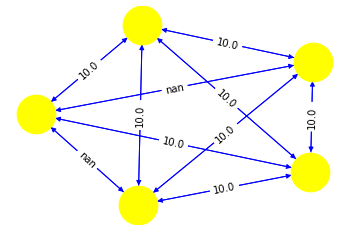

In [33]:
pos=nx.spring_layout(G1)
edge_labels=dict([((u,v,),d['flow_volume_in_unipartite'])
                 for u,v,d in G1.edges(data=True)])
nx.draw_networkx_edge_labels(G1,pos,edge_labels=edge_labels)
nx.draw(G1,pos, node_color = 'yellow', node_size=1500,edge_color='blue')
pylab.show()

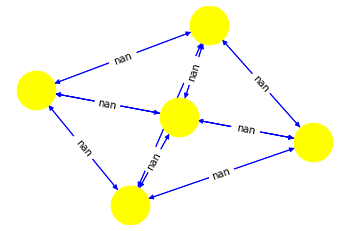

In [34]:
pos=nx.spring_layout(G2)
edge_labels=dict([((u,v,),d['exists_in_bipirtate'])
                 for u,v,d in G2.edges(data=True)])
nx.draw_networkx_edge_labels(G2,pos,edge_labels=edge_labels)
nx.draw(G2,pos, node_color = 'yellow', node_size=1500,edge_color='blue')
pylab.show()

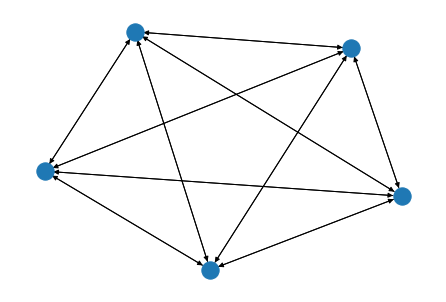

In [35]:
nx.draw(G1)

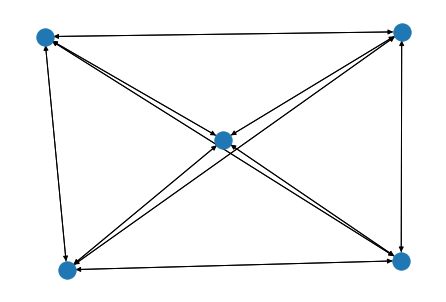

In [36]:
nx.draw(G2)

# Manually check

In [37]:
all_combinations[(all_combinations['origin_ID'] == 'A') & (all_combinations['destination_ID'] == 'E')]

,origin_ID,destination_ID,flow_volume_in_unipartite,exists_in_bipirtate,distances,distances_0,nodes,Dest_masses,acc_uni,acc_bi,...,acc_uni_low,acc_bi_low,diff_uni,diff_bi,diff_uni_low,diff_bi_low,uni_perc_low_change,uni_perc_rem_change,bi_perc_low_change,bi_perc_rem_change
4,A,E,10.0,10.0,5,5,E,50,190,150,...,190,150,60,60,0,0,0.0,31.578947,0.0,40.0


In [38]:
all_combinations[(all_combinations['origin_ID'] == 'E')]

,origin_ID,destination_ID,flow_volume_in_unipartite,exists_in_bipirtate,distances,distances_0,nodes,Dest_masses,acc_uni,acc_bi,...,acc_uni_low,acc_bi_low,diff_uni,diff_bi,diff_uni_low,diff_bi_low,uni_perc_low_change,uni_perc_rem_change,bi_perc_low_change,bi_perc_rem_change
20,E,A,10.0,NaN,5,5,A,60,230,0,...,230,0,0,0,0,0,0.0,0.0,NaN,NaN
21,E,B,10.0,NaN,4,4,B,10,690,0,...,690,0,0,0,0,0,0.0,0.0,NaN,NaN
22,E,C,NaN,NaN,9,9,C,10,400,0,...,400,0,0,0,0,0,0.0,0.0,NaN,NaN
23,E,D,10.0,NaN,2,2,D,30,370,0,...,370,0,0,0,0,0,0.0,0.0,NaN,NaN
24,E,E,10.0,NaN,0,0,E,50,400,0,...,400,0,0,0,0,0,0.0,0.0,NaN,NaN


AB

A  C B 10 * 10 = 100
A  D B 10 * 7 = 70
A  E B 10 * 4 = 40

210 

In [39]:
D = all_combinations['destination_ID'][4]
O = all_combinations['origin_ID'][4]
print(O)
print(D)

A
E


In [40]:
all_dest = (all_combinations.query('origin_ID == @O')
                .query('flow_volume_in_unipartite > 0')
                ['destination_ID']
                .unique()
               )    
all_dest

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [41]:
all_dest2 = (all_combinations.query('origin_ID == @O')
                .query('exists_in_bipirtate > 0')
                ['destination_ID']
                .unique()
               )    
all_dest2

array(['C', 'D', 'E'], dtype=object)

In [42]:
x1 = pd.DataFrame({'D': np.array([D]*len(all_dest), dtype=object), 
                       'dests':all_dest}).merge(all_combinations, how='left', left_on=['D','dests'], right_on=['origin_ID','destination_ID'])
x1.loc[:,['D','dests','flow_volume_in_unipartite','distances','Dest_masses']]   

,D,dests,flow_volume_in_unipartite,distances,Dest_masses
0,E,A,10.0,5,60
1,E,B,10.0,4,10
2,E,C,NaN,9,10
3,E,D,10.0,2,30
4,E,E,10.0,0,50


In [43]:
x2 = pd.DataFrame({'D': np.array([D]*len(all_dest2), dtype=object), 
                       'dests':all_dest2}).merge(all_combinations, how='left', left_on=['D','dests'], right_on=['origin_ID','destination_ID'])
x2.loc[:,['D','dests','exists_in_bipirtate','distances','Dest_masses']]   

,D,dests,exists_in_bipirtate,distances,Dest_masses
0,E,C,NaN,9,10
1,E,D,NaN,2,30
2,E,E,NaN,0,50


In [44]:
x1 = x1[~x1.dests.isin(list(O))]
x2 = x2[~x2.dests.isin(list(O))]

In [45]:
x1.loc[:,['D','dests','flow_volume_in_unipartite','distances','Dest_masses']]   

,D,dests,flow_volume_in_unipartite,distances,Dest_masses
1,E,B,10.0,4,10
2,E,C,NaN,9,10
3,E,D,10.0,2,30
4,E,E,10.0,0,50


In [46]:
x2.loc[:,['D','dests','flow_volume_in_unipartite','distances','Dest_masses']]   

,D,dests,flow_volume_in_unipartite,distances,Dest_masses
0,E,C,NaN,9,10
1,E,D,10.0,2,30
2,E,E,10.0,0,50


In [47]:
A = (x1['distances']*x1['Dest_masses']).sum()
A

190

In [48]:
A2 = (x2['distances']*x2['Dest_masses']).sum()
A2

150

In [51]:
def AFED(flow_df, row_index, all_destinations=False): # AFAPF
    
    # rename teh columns so we can call them 
    flow_df = flow_df.rename(columns = {flow_df.columns[0]:'origin_ID', 
                                            flow_df.columns[1]:'dest_ID', 
                                            flow_df.columns[2]:'dist', 
                                            flow_df.columns[3]:'weight', 
                                            flow_df.columns[4]:'dest_mass'})
    # define O and D for each row the variables
    D = flow_df['dest_ID'][row_index]
    O = flow_df['origin_ID'][row_index]
    
    
    # get the list of possible destinations 
    if all_destinations:
         all_dest = (flow_df.query('origin_ID == @O')
                ['dest_ID']
                .unique()
               )
    else:
        all_dest = (flow_df.query('origin_ID == @O')
                .query('weight > 0')
                ['dest_ID']
                .unique()
               )

        
    # Create all destination flows 
    x1 = pd.DataFrame({'D': np.array([D]*len(all_dest), dtype=object), 
                       'dests':all_dest}).merge(flow_df, how='left', left_on=['D','dests'], right_on=['origin_ID','dest_ID'])
    
    # merge with the distances and masses 
    
    # Delete the flow to origin
    x1 = x1[~x1.dests.isin(list(O))]    

    # calculate the accessibility
    A = (x1['dist']*x1['dest_mass']).sum()

    return A

In [52]:
# base uni
start = timer()
A_ij = []
for idx in flow1.index:
    A = AFED(flow_df=flow1, row_index=idx, all_destinations=False)
    A_ij.append(A)
end = timer()
all_combinations['acc_uni_new'] = pd.Series(A_ij)
print('time: ' + str(end - start))


time: 0.19690120000001343


In [53]:
all_combinations['acc_uni_new']

0     500
1     510
2     730
3     580
4     190
5     400
6     890
7     750
8     750
9     360
10    150
11    690
12    300
13    300
14    360
15    350
16    780
17    670
18    880
19    430
20    230
21    690
22    400
23    370
24    400
Name: acc_uni_new, dtype: int64

In [54]:
# base uni
start = timer()
A_ij = []
for idx in flow1.index:
    A = AFED(flow_df=flow1, row_index=idx, all_destinations=True)
    A_ij.append(A)
end = timer()
all_combinations['acc_uni_new2'] = pd.Series(A_ij)
print('time: ' + str(end - start))


time: 0.144896899999992


In [56]:
all_combinations['acc_uni_new'] - all_combinations['acc_uni_new2']

0       0
1       0
2       0
3       0
4       0
5     -20
6    -100
7       0
8     -60
9     -90
10   -330
11   -200
12   -550
13   -520
14    -40
15      0
16      0
17      0
18      0
19      0
20    -20
21   -100
22      0
23    -60
24    -90
dtype: int64

In [1]:
import pandas, geopandas, io, numpy
from sklearn import metrics


def flows(n_hubs=None, seed=2478879):
    numpy.random.seed(seed)
    points = geopandas.read_file("./points.geojson")

    if n_hubs is not None:
        points = points.head(n_hubs)

    distance_matrix = metrics.pairwise_distances(
        points[["X", "Y"]].values, metric="haversine"
    )
    distance_frame = pandas.DataFrame(
        distance_matrix, index=points.ID_code, columns=points.ID_code
    )

    flows = (
        distance_frame.melt(ignore_index=False)
        .rename(columns=dict(ID_code="destination"))
        .reset_index()
        .rename(columns=dict(ID_code="origin", value="distance"))
    )

    points["hubscore"] = numpy.random.exponential(size=points.shape[0]).astype(float)
    points["mass"] = numpy.random.poisson(
        points.hubscore * 100000, size=points.shape[0]
    ).astype(float)

    # each flow is $$f_{ij} \sim poisson\left(\frac{1000h_ih_j}{(100d_{ij})^2 + 100}\right)$$
    # where $h_i$ and $h_j$ are the "hubbiness" of the two places.
    # Each mass $$m_i \sim poisson(h_i*100000)$$

    flows["weight"] = numpy.random.poisson(
        flows.merge(
            points[["ID_code", "hubscore"]], left_on="origin", right_on="ID_code"
        )
        .merge(
            points[["ID_code", "hubscore"]],
            left_on="destination",
            right_on="ID_code",
            suffixes=("_origin", "_destination"),
        )
        .eval("10000*hubscore_origin*hubscore_destination/((100 * distance)**2+100)")
    ).astype(float)

    complete_flows = (
        flows.merge(points[["ID_code", "mass"]], left_on="origin", right_on="ID_code")
        .drop("ID_code", axis=1)
        .merge(
            points[["ID_code", "mass"]],
            left_on="destination",
            right_on="ID_code",
            suffixes=("_origin", "_destination"),
        )
    ).drop("ID_code", axis=1)

    return complete_flows.sample(frac=0.9, replace=False)


def toy():
    df = """origin,destination,distance,mass_destination,mass_origin,weight
a,a,0,60,60,80
a,b,2,25,60,0
a,c,10,30,60,2
b,a,2,60,25,5
b,b,0,25,25,0
b,c,20,30,25,7
c,a,10,60,30,0
c,b,20,25,30,10
c,c,0,30,30,0"""
    return pandas.read_csv(io.StringIO(df))


In [17]:
def dummy():
    df = """O,D,dist
    A,A,5
    A,B,25
    """
    return pandas.read_csv(io.StringIO(df))

In [18]:
dummy()

,O,D,dist
0,A,A,5
1,A,B,25


In [21]:
import numpy, pandas
from sklearn.preprocessing import LabelEncoder

try:
    from numba import njit
except ImportError:

    def njit(fastmath):
        def decorator(func):
            return func
        return decorator

def access(flows, filter_flow=False, n_jobs=-1):

    origins = flows.origin.unique()
    destinations = flows.destination.unique()

    encoder = LabelEncoder().fit(numpy.hstack((origins, destinations)))

    flows["ocode"] = encoder.transform(flows.origin)
    flows["dcode"] = encoder.transform(flows.destination)

    all_masses = numpy.ones(encoder.classes_.shape[0]) * -1
    all_masses[flows.ocode] = flows.mass_origin
    all_masses[flows.dcode] = flows.mass_destination
    assert (all_masses >= 0).all()

    fakeflows = numpy.ones_like(flows.weight.values)
    if n_jobs == 1:
        accs = _access_numba(
            flows.ocode.values,
            flows.dcode.values,
            all_masses,
            flows.weight.values if filter_flow else fakeflows,
            flows.distance.values,
        )
    else:
        from joblib import Parallel, delayed

        engine = Parallel()
        promise = delayed(_access_numba_i)
        accs = engine(
            promise(
                i,
                flows.ocode.values,
                flows.dcode.values,
                all_masses,
                flows.weight.values if filter_flow else fakeflows,
                flows.distance.values,
            )
            for i in range(flows.shape[0])
        )

    return flows.assign(accessibility=accs)


@njit(fastmath=True)
def _access_numba(origins, destinations, all_masses, weights, distances):
    n_flows = weights.shape[0]

    accessibilities = numpy.zeros(weights.shape, dtype=weights.dtype)
    for flowix in range(n_flows):
        accessibilities[flowix] = _access_numba_i(
            flowix, origins, destinations, all_masses, weights, distances
        )
    return accessibilities


@njit(fastmath=True)
def _access_numba_i(flowix, origins, destinations, all_masses, weights, distances):
    oix = origins[flowix]
    dix = destinations[flowix]
    if oix == dix:
        return 0
    from_origin = origins == oix
    to_destination = destinations == dix
    from_destination = origins == dix
    competitors = destinations[from_origin & (~to_destination)]
    acc_d = 0
    for competitor in competitors:
        if competitor == oix:
            continue
        if competitor == dix:
            continue
        to_competitor = destinations == competitor
        if not (from_destination & to_competitor).any():
            continue
        if not (from_origin & to_competitor).any():
            continue
        d_dest_to_comp = distances[from_destination & to_competitor]
        w_dest_to_comp = weights[from_origin & to_competitor] > 0
        wdist = (all_masses[competitor] * d_dest_to_comp * w_dest_to_comp)[0]
        acc_d += wdist
    return acc_d


if __name__ == "__main__":
    import data
    a1 = access(data.toy())

    numpy.testing.assert_array_equal(
        a1.accessibility,
        [
            0,  # A_aa is always zero
            30 * 20,  # A_ab is mass of c times distance from b to c
            25 * 20,  # A_ac is mass of b times distance from c to b
            30 * 10,  # A_ba is mass of c times distance from a to c
            0,  # A_bb is always zero
            60 * 10,  # A_bc is mass of a times the distance from c to a
            25 * 2,  # A_ca is mass of b times distance from a to b
            60 * 2,  # A_cb is mass of a times distance from b to a
            0,  # A_cc is always zero
        ],
    )
    print("passed no filter.")
    a2 = access_slow(data.toy(), filter_flow=True)

    numpy.testing.assert_array_equal(
        a2.accessibility,
        [
            0,  # A_aa is always zero
            30 * 20,  # A_ab is mass of c times distance from b to c if flow a -> c
            25 * 20 * 0,  # A_ac is mass of b times distance from c to b if flow a -> b
            30 * 10,  # A_ba is mass of c times distance from a to c if flow b -> c
            0,  # A_bb is always zero
            60 * 10,  # A_bc is mass of a times the distance from c to a if flow b -> a
            25 * 2,  # A_ca is mass of b times distance from c to b if flow c -> b
            60 * 10 * 0,  # A_cb has no routes from c to a if flow c -> a
            0,  # A_cc is always zero
        ],
    )
    print("passed with filter.")

passed no filter.


NameError: name 'access_slow' is not defined

In [13]:

from tqdm import tqdm

def access(flows, step=False, filter_flow=False):
    accessibilities = []
    for row, flowvec in tqdm(flows.iterrows()):
        oid, did = flowvec.origin, flowvec.destination
        if step:
            print(
                f"-----------------------------\nComputing accessibility of {did} to {oid}"
            )
        alternatives = flows.query("origin == @oid")
        if step:
            print(f"\t{oid} can get to {alternatives.destination.tolist()}")
        accessibility = 0
        if oid == did:
            if step:
                print(
                    f"\t\torigin {oid} is exactly destination {did}, so accessibility is zero"
                )
            accessibilities.append(accessibility)
            continue
        for _, alternative in alternatives.iterrows():
            if step:
                input()
            if alternative.destination == did:
                if step:
                    print(
                        f"\t\tSkipping {alternative.destination} because it is target destination {did}"
                    )
                continue
            if alternative.destination == oid:
                if step:
                    print(
                        f"\t\tSkipping {alternative.destination} because it is target origin {oid}"
                    )
                continue
            if filter_flow and (not (alternative.weight > 0)):
                if step:
                    print(
                        f"\t\tSkipping {alternative.destination} because it has negative or zero flow from {oid}"
                    )
                continue
            this_alternative_from_destination = flows.query(
                "origin == @did & destination == @alternative.destination"
            )
            if this_alternative_from_destination.empty:
                if step:
                    print(
                        f"\t\tSkipping {alternative.destination} because there are no routes from {did} to {alternative.destination}"
                    )
                continue
            ak = this_alternative_from_destination.eval(
                "mass_destination * distance"
            ).item()
            if step:
                print(
                    f"\t\t\t A_{oid},{did} gets {this_alternative_from_destination.mass_destination.item()}*{this_alternative_from_destination.distance.item()} from {alternative.destination}"
                )
            accessibility += ak
        accessibilities.append(accessibility)
    return flows.assign(accessibility=accessibilities)

if __name__ == "__main__":
    import numpy, data
    wants_step = input("Do you want to step through the iterations? [Y/n]")
    if wants_step.lower().startswith("y"):
        step = True
    else:
        step = False


    a1 = access_slow(data.toy(), step=step)
    print(data.toy())

    numpy.testing.assert_array_equal(
        a1.accessibility,
        [
            0,  # A_aa is always zero
            30 * 20,  # A_ab is mass of c times distance from b to c
            25 * 20,  # A_ac is mass of b times distance from c to b
            30 * 10,  # A_ba is mass of c times distance from a to c
            0,  # A_bb is always zero
            60 * 10,  # A_bc is mass of a times the distance from c to a
            25 * 2,  # A_ca is mass of b times distance from a to b
            60 * 2,  # A_cb is mass of a times distance from b to a
            0,  # A_cc is always zero
        ],
    )
    print("passed no filter.")
    a2 = access_slow(data.toy(), step=step, filter_flow=True)

    numpy.testing.assert_array_equal(
        a2.accessibility,
        [
            0,  # A_aa is always zero
            30 * 20,  # A_ab is mass of c times distance from b to c if flow a -> c
            25 * 20 * 0,  # A_ac is mass of b times distance from c to b if flow a -> b
            30 * 10,  # A_ba is mass of c times distance from a to c if flow b -> c
            0,  # A_bb is always zero
            60 * 10,  # A_bc is mass of a times the distance from c to a if flow b -> a
            25 * 2,  # A_ca is mass of b times distance from c to b if flow c -> b
            60 * 10 * 0,  # A_cb has no routes from c to a if flow c -> a
            0,  # A_cc is always zero
        ],
    )
    print("passed with filter.")

    print("-" * 30 + "trying tabular" + "-" * 30)

    t1 = access(data.toy())
    numpy.testing.assert_array_equal(t1.accessibility, a1.accessibility)
    print("passed toy tabular unfiltered")

    t2 = access(data.toy(), filter_flow=True)
    numpy.testing.assert_array_equal(t2.accessibility, a2.accessibility)
    print("passed toy tabular filtered")

    a3 = access_slow(data.flows(n_hubs=427), step=step, filter_flow=True)
    t3 = access(data.flows(n_hubs=427), filter_flow=True)
    numpy.testing.assert_array_equal(t3.accessibility, a3.accessibility)
    print("passed half tabular filtered")

    t4 = access(data.flows(n_hubs=427), filter_flow=False)
    a4 = access_slow(data.flows(n_hubs=427), step=step, filter_flow=False)
    numpy.testing.assert_array_equal(t4.accessibility, a2.accessibility)
    print("passed half tabular unfiltered")

    t5 = access(data.flows(), filter_flow=True)
    a5 = access_slow(data.flows(), step=step, filter_flow=True)
    numpy.testing.assert_array_equal(t5.accessibility, a2.accessibility)
    print("passed full tabular filtered")

    t6 = access(data.flows(), filter_flow=False)
    a6 = access_slow(data.flows(), step=step, filter_flow=False)
    numpy.testing.assert_array_equal(t6.accessibility, a2.accessibility)
    print("passed full tabular unfiltered")


Do you want to step through the iterations? [Y/n] y


NameError: name 'access_slow' is not defined

In [14]:

if __name__ == "__main__":
    import data
    from access import access
    from access_jit import access as access_jit
    from access_tab import access as access_tab
    from datetime import datetime
    print("-" * 30 + "confirm agreement" + "-" * 30)

    filter_flows = False
    a1 = access(data.toy(), filter_flow=filter_flows)
    j1 = access_jit(data.toy(), filter_flow=filter_flows)
    t1 = access_tab(data.toy(), filter_flow=filter_flows)

    numpy.testing.assert_array_equal(t1.accessibility, a1.accessibility)
    numpy.testing.assert_array_equal(t1.accessibility, j1.accessibility)
    print("passed toy tabular unfiltered")

    filter_flows = True
    a1f = access(data.toy(), filter_flow=filter_flows)
    j1f = access_jit(data.toy(), filter_flow=filter_flows)
    t1f = access_tab(data.toy(), filter_flow=filter_flows)

    numpy.testing.assert_array_equal(t1f.accessibility, a1f.accessibility)
    numpy.testing.assert_array_equal(t1f.accessibility, j1f.accessibility)
    print("passed toy tabular unfiltered")

    filter_flows = False
    a2 = access(data.flows(n_hubs=20), filter_flow=filter_flows)
    j2 = access_jit(data.flows(n_hubs=20), filter_flow=filter_flows)
    t2 = access_tab(data.flows(n_hubs=20), filter_flow=filter_flows)
    
    numpy.testing.assert_array_equal(t2.accessibility, a2.accessibility)
    numpy.testing.assert_array_equal(t2.accessibility, j2.accessibility)
    print("passed f20 tabular unfiltered")

    filter_flows = True
    a2f = access(data.flows(n_hubs=20), filter_flow=filter_flows)
    j2f = access_jit(data.flows(n_hubs=20), filter_flow=filter_flows)
    t2f = access_tab(data.flows(n_hubs=20), filter_flow=filter_flows)
    
    numpy.testing.assert_array_equal(t2f.accessibility, a2f.accessibility)
    numpy.testing.assert_array_equal(t2f.accessibility, j2f.accessibility)
    print("passed f20 tabular unfiltered")

    filter_flows = False
    a3 = access(data.flows(n_hubs=400), filter_flow=filter_flows)
    j3 = access_jit(data.flows(n_hubs=400), filter_flow=filter_flows)
    t3 = access_tab(data.flows(n_hubs=400), filter_flow=filter_flows)
    
    numpy.testing.assert_array_equal(t3.accessibility, a3.accessibility)
    numpy.testing.assert_array_equal(t3.accessibility, j3.accessibility)
    print("passed f400 tabular unfiltered")

    filter_flows = True
    a3f = access(data.flows(n_hubs=400), filter_flow=filter_flows)
    j3f = access_jit(data.flows(n_hubs=400), filter_flow=filter_flows)
    t3f = access_tab(data.flows(n_hubs=400), filter_flow=filter_flows)
    
    numpy.testing.assert_array_equal(t3f.accessibility, a3f.accessibility)
    numpy.testing.assert_array_equal(t3f.accessibility, j3f.accessibility)
    print("passed f400 tabular unfiltered")

    filter_flows = False
    a4 = access(data.flows(n_hubs=None), filter_flow=filter_flows)
    j4 = access_jit(data.flows(n_hubs=None), filter_flow=filter_flows)
    t4 = access_tab(data.flows(n_hubs=None), filter_flow=filter_flows)
    
    numpy.testing.assert_array_equal(t4.accessibility, a4.accessibility)
    numpy.testing.assert_array_equal(t4.accessibility, j4.accessibility)
    print("passed f tabular unfiltered")

    filter_flows = True
    a4f = access(data.flows(n_hubs=None), filter_flow=filter_flows)
    j4f = access_jit(data.flows(n_hubs=None), filter_flow=filter_flows)
    t4f = access_tab(data.flows(n_hubs=None), filter_flow=filter_flows)
    
    numpy.testing.assert_array_equal(t4f.accessibility, a4f.accessibility)
    numpy.testing.assert_array_equal(t4f.accessibility, j4f.accessibility)
    print("passed f tabular unfiltered")


NameError: name 'decorator' is not defined